# PHYS4015 Lab 2

In [1]:
from __future__ import print_function
import torch
import os
import random
import numpy as np
import argparse
import scipy.io as sio
import math

import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import torch.nn.parallel
import torchvision

import matplotlib.pyplot as plt

In [2]:
import sys
# add full path of nn-train
main_path = os.getcwd()
path = f"{main_path}\\nn-train"
sys.path.append(path)

## 2.0 Identifying the problem

In [3]:
batch_size_train = 1024
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)
images, labels = next(iter(train_loader))


c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Text(0.5, 1.0, 'Label: 8')

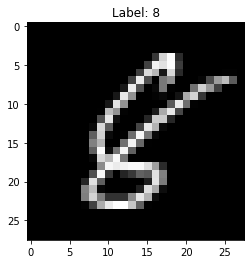

In [4]:
# images
idx = 2
plt.imshow(images[idx].reshape(28,28), cmap="gray")
plt.title(f"Label: {labels[idx]}")

## 2.1 Calling Network

In [5]:
from train_stuff.model_loader import load

In [6]:
net = load('fc2')
print(net)

FullyConnected(
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=False)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=100, out_features=10, bias=False)
  )
)


In [7]:
weights = net.state_dict()
layers = list(net.state_dict().keys())
layers[1]
 

'fc.2.weight'

## 2.2 Loading Weights

In [8]:
# to train network, run "python main.py" in the terminal

trained_nets = f"{path}/trained_nets"
net_ls = [net[0] for net in os.walk(trained_nets)]

In [9]:
net_ls[1]

'c:\\Users\\Kevin Qu\\Dropbox (Sydney Uni)\\Research_all\\Lecturing\\PHYS4015\\Labs\\nn-train/trained_nets\\fc2_epoch10_lr=0.1_bs=1024'

In [10]:
folder_name = net_ls[1]
sub_weights = sio.loadmat(f"{folder_name}/model_1_sub_loss_w.mat")
weights = sub_weights['sub_weights'][0]

In [11]:
len(weights)

2

In [12]:
weights[0]

array([[ 0.02688497,  0.01193325,  0.0189219 , ..., -0.01734629,
        -0.03632839,  0.02071006],
       [ 0.0210528 , -0.00875142, -0.03306577, ..., -0.01654344,
        -0.02464799, -0.03353978],
       [ 0.03001465, -0.00288864,  0.02077006, ..., -0.02982154,
        -0.00045312, -0.00042258],
       ...,
       [-0.01856406,  0.01115209, -0.02962813, ..., -0.02621236,
        -0.02706588, -0.01760997],
       [ 0.00185332,  0.0092824 , -0.00945008, ...,  0.01136091,
         0.02750508, -0.00375697],
       [-0.01981592, -0.02280488, -0.01763484, ...,  0.02635565,
        -0.02539263, -0.03230671]], dtype=float32)

In [13]:
net_weights = net.state_dict()
layers = list(net.state_dict().keys())
 

In [14]:
net_weights[layers[0]].shape

torch.Size([100, 784])

In [15]:
w_tensor0 = torch.from_numpy(weights[0])
type(w_tensor0)

torch.Tensor

In [16]:
net_weights[layers[0]] = w_tensor0

In [17]:
net_weights[layers[0]]

tensor([[ 0.0269,  0.0119,  0.0189,  ..., -0.0173, -0.0363,  0.0207],
        [ 0.0211, -0.0088, -0.0331,  ..., -0.0165, -0.0246, -0.0335],
        [ 0.0300, -0.0029,  0.0208,  ..., -0.0298, -0.0005, -0.0004],
        ...,
        [-0.0186,  0.0112, -0.0296,  ..., -0.0262, -0.0271, -0.0176],
        [ 0.0019,  0.0093, -0.0095,  ...,  0.0114,  0.0275, -0.0038],
        [-0.0198, -0.0228, -0.0176,  ...,  0.0264, -0.0254, -0.0323]])

In [18]:
weights[0]

array([[ 0.02688497,  0.01193325,  0.0189219 , ..., -0.01734629,
        -0.03632839,  0.02071006],
       [ 0.0210528 , -0.00875142, -0.03306577, ..., -0.01654344,
        -0.02464799, -0.03353978],
       [ 0.03001465, -0.00288864,  0.02077006, ..., -0.02982154,
        -0.00045312, -0.00042258],
       ...,
       [-0.01856406,  0.01115209, -0.02962813, ..., -0.02621236,
        -0.02706588, -0.01760997],
       [ 0.00185332,  0.0092824 , -0.00945008, ...,  0.01136091,
         0.02750508, -0.00375697],
       [-0.01981592, -0.02280488, -0.01763484, ...,  0.02635565,
        -0.02539263, -0.03230671]], dtype=float32)

In [19]:
net = load('fc2')
print(net)

FullyConnected(
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=False)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=100, out_features=10, bias=False)
  )
)


In [20]:
net_weights[layers[0]]

tensor([[ 0.0269,  0.0119,  0.0189,  ..., -0.0173, -0.0363,  0.0207],
        [ 0.0211, -0.0088, -0.0331,  ..., -0.0165, -0.0246, -0.0335],
        [ 0.0300, -0.0029,  0.0208,  ..., -0.0298, -0.0005, -0.0004],
        ...,
        [-0.0186,  0.0112, -0.0296,  ..., -0.0262, -0.0271, -0.0176],
        [ 0.0019,  0.0093, -0.0095,  ...,  0.0114,  0.0275, -0.0038],
        [-0.0198, -0.0228, -0.0176,  ...,  0.0264, -0.0254, -0.0323]])

In [21]:
net.state_dict()[layers[0]].data.copy_(torch.from_numpy(weights[0]))

tensor([[ 0.0269,  0.0119,  0.0189,  ..., -0.0173, -0.0363,  0.0207],
        [ 0.0211, -0.0088, -0.0331,  ..., -0.0165, -0.0246, -0.0335],
        [ 0.0300, -0.0029,  0.0208,  ..., -0.0298, -0.0005, -0.0004],
        ...,
        [-0.0186,  0.0112, -0.0296,  ..., -0.0262, -0.0271, -0.0176],
        [ 0.0019,  0.0093, -0.0095,  ...,  0.0114,  0.0275, -0.0038],
        [-0.0198, -0.0228, -0.0176,  ...,  0.0264, -0.0254, -0.0323]])

## 2.3 Plotting accuracy

In [22]:
folder_name = net_ls[1]
acc_loss = sio.loadmat(f"{folder_name}/fc2_loss_log.mat")

In [23]:
acc_loss['testing_history']

array([[ 0.36634788, 90.13      ],
       [ 0.30430829, 91.41      ],
       [ 0.26772168, 92.38      ],
       [ 0.24493462, 92.85      ],
       [ 0.22574834, 93.61      ],
       [ 0.21196934, 93.89      ],
       [ 0.1985233 , 94.08      ],
       [ 0.18361234, 94.59      ],
       [ 0.17677881, 94.9       ],
       [ 0.16713383, 95.03      ]])

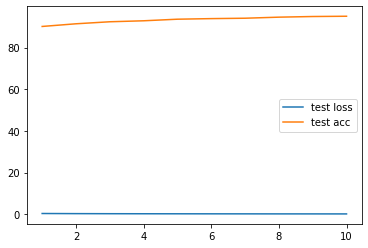

In [24]:
plt.plot(list(range(1,11)),acc_loss['testing_history'][:,0],label='test loss')
plt.plot(list(range(1,11)),acc_loss['testing_history'][:,1],label='test acc')
plt.legend()
plt.show()

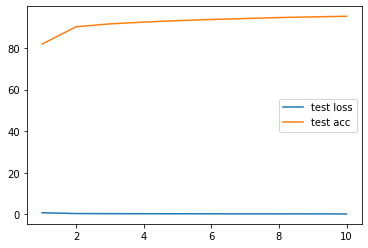

In [25]:
plt.plot(list(range(1,11)),acc_loss['training_history'][:,0],label='test loss')
plt.plot(list(range(1,11)),acc_loss['training_history'][:,1],label='test acc')
plt.legend()
plt.show()

## References

1. https://distill.pub/2017/momentum/
2. https://ruder.io/optimizing-gradient-descent/
3. https://medium.com/mdr-inc/from-sgd-to-adam-c9fce513c4bb
4. https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c